# Data Acquisition / Numerical EDA

In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

df = pd.read_json('votes.json')

# Displays first 5
df.head()

Saving votes.json to votes.json


,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


# Displays the dataframe info.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   party              435 non-null    object
 1   infants            435 non-null    int64 
 2   water              435 non-null    int64 
 3   budget             435 non-null    int64 
 4   physician          435 non-null    int64 
 5   salvador           435 non-null    int64 
 6   religious          435 non-null    int64 
 7   satellite          435 non-null    int64 
 8   aid                435 non-null    int64 
 9   missile            435 non-null    int64 
 10  immigration        435 non-null    int64 
 11  synfuels           435 non-null    int64 
 12  education          435 non-null    int64 
 13  superfund          435 non-null    int64 
 14  crime              435 non-null    int64 
 15  duty_free_exports  435 non-null    int64 
 16  eaa_rsa            435 non-null    int64 
dt

# Discribes the dataframe.

In [3]:
df.describe()

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,0.429885,0.558621,0.606897,0.406897,0.521839,0.650575,0.581609,0.590805,0.526437,0.512644,0.344828,0.393103,0.537931,0.609195,0.400000,0.857471
std,0.495630,0.497123,0.489002,0.491821,0.500098,0.477337,0.493863,0.492252,0.499876,0.500416,0.475859,0.489002,0.499133,0.488493,0.490462,0.349994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Visual EDA

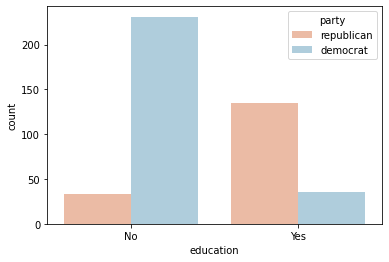

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

# Fit a k-Nearest neighbors classifier

In [11]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

# Predict k-Nearest neighbors with training data set

In [15]:
# Predict the labels for the training data X
y_pred = knn.predict(X)


X_new = np.array([[5.6, 2.8, 3.9, 1.1, 5.7, 2.6, 3.8, 1.3, 5.6, 2.8, 3.9, 1.1, 5.7, 2.6, 3.8, 1.3], [5.6, 2.8, 3.9, 1.1, 5.7, 2.6, 3.8, 1.3, 5.7, 2.6, 3.8, 1.3, 5.7, 2.6, 3.8, 1.3], [5.7, 2.6, 3.8, 1.3, 4.7, 3.2, 1.3, 0.2, 5.6, 2.8, 3.9, 1.1, 5.7, 2.6, 3.8, 1.3]])

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat' 'democrat' 'democrat']


# Check model accuracy with test data set

In [20]:
from sklearn import datasets

# Load the digits dataset: digits
digits = datasets.load_digits()
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333
